<a href="https://colab.research.google.com/github/onyeogulu/YOLOV5-on-Custom-Dataset/blob/main/Yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## importing required libraries
import os
import shutil
import random

In [ ]:
## connecting to the google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/Data.v1i.yolov5pytorch/train/images"
val_path = "/content/drive/MyDrive/face_mask_detection/face_data/val/images"
test_path = "/content/drive/MyDrive/face_mask_detection/face_data/test"

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12228, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 12228 (delta 15), reused 20 (delta 8), pack-reused 12195
Receiving objects: 100% (12228/12228), 11.98 MiB | 25.08 MiB/s, done.
Resolving deltas: 100% (8459/8459), done.


In [ ]:
### change the dir to dyolov5
%cd yolov5/

/content/yolov5


In [ ]:
### install all requirements

!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 14.2 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!python train.py --img 640 --batch 16 --epochs 50 --data /content/drive/MyDrive/Data.v1i.yolov5pytorch/data.yaml --weights /content/drive/MyDrive/Data.v1i.yolov5pytorch/Izz_1.pt --nosave --cache

train: weights=/content/drive/MyDrive/Data.v1i.yolov5pytorch/Izz_1.pt, cfg=, data=/content/drive/MyDrive/Data.v1i.yolov5pytorch/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-250-g6adc53b Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp18/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## inference or detection on new images
!python detect.py --source /content/drive/MyDrive/Data.v1i.yolov5pytorch/test/images --weights /content/yolov5/runs/train/exp/weights/last.pt --img 416 --save-txt --save-conf

detect: weights=['/content/yolov5/runs/train/exp/weights/last.pt'], source=/content/drive/MyDrive/Data.v1i.yolov5pytorch/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-250-g6adc53b Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 224 layers, 7062001 parameters, 0 gradients
image 1/52 /content/drive/MyDrive/Data.v1i.yolov5pytorch/test/images/115_png.rf.a29dd36d7a32aa43542428b6a7128ac0.jpg: 416x416 1 blue, 1 yellow, Done. (0.012s)
image 2/52 /content/drive/MyDrive/Data.v1i.yolov5pytorch/test/images/116_png.rf.0390c116ae6b3e0eb3c9f04995c5408e.jpg: 416x416 6 blues, 6 yellows, Done. (0.012s)
i

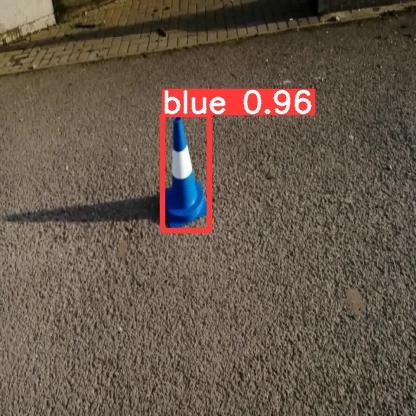

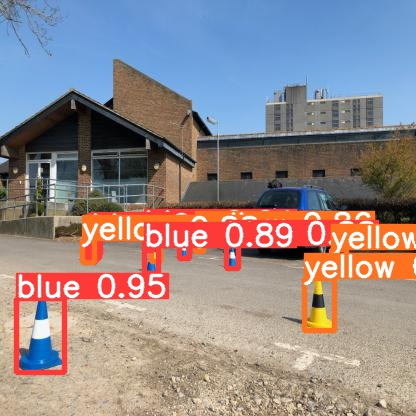

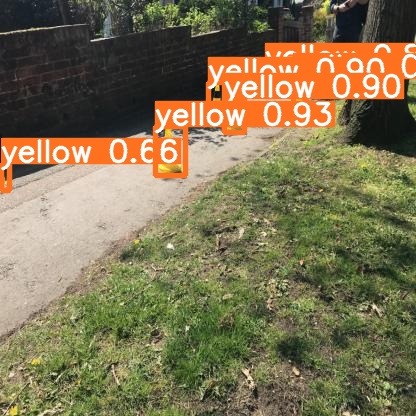

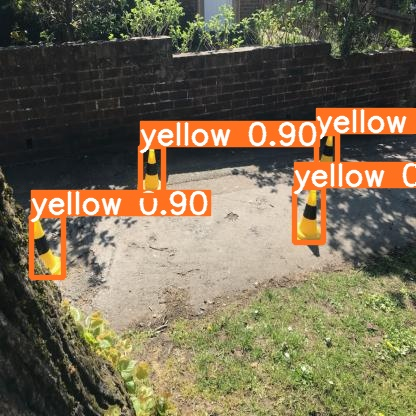

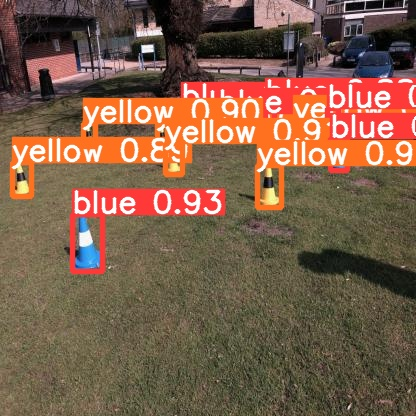

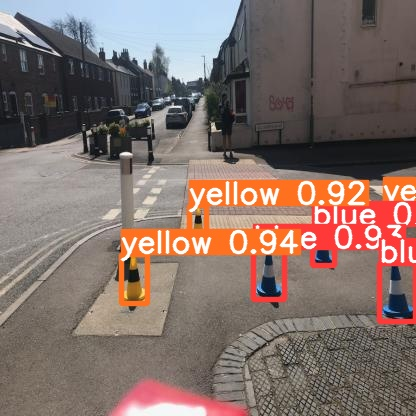

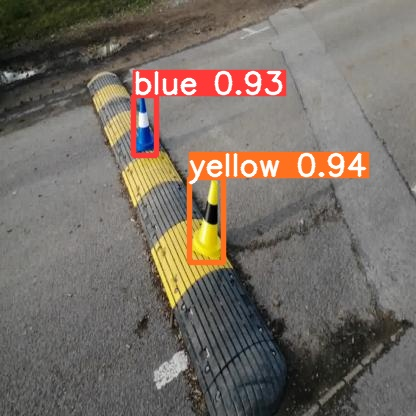

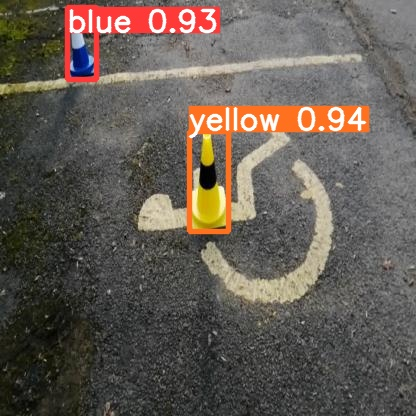

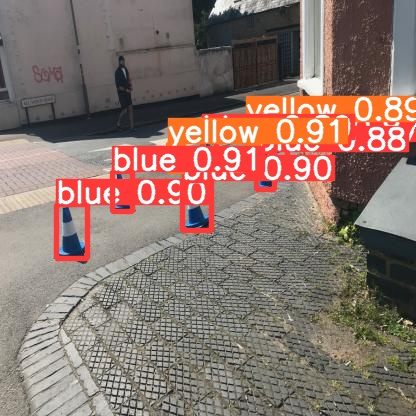

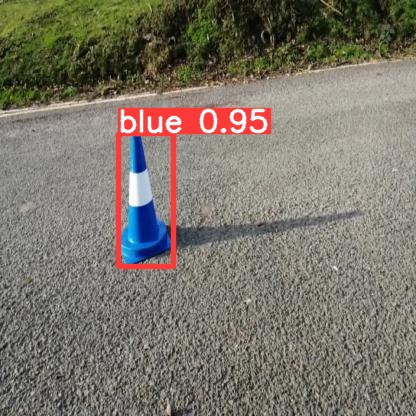

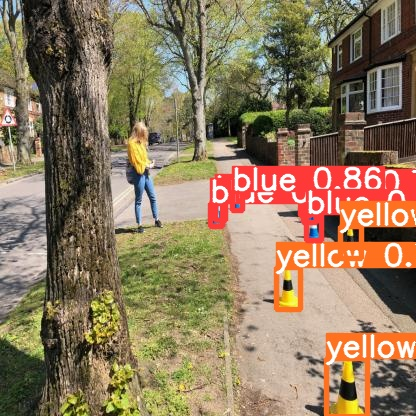

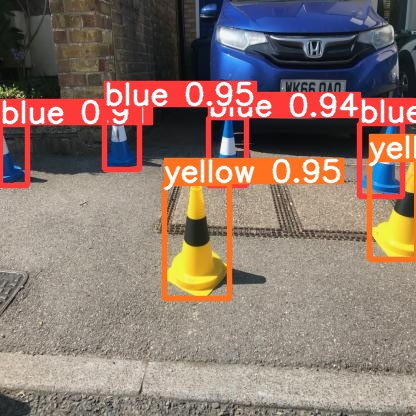

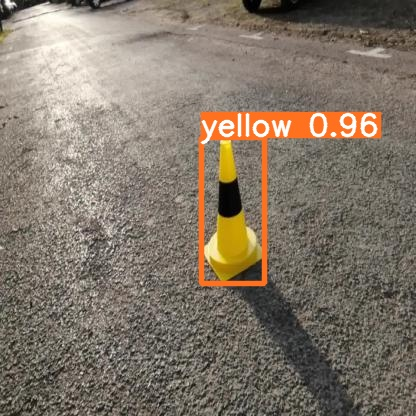

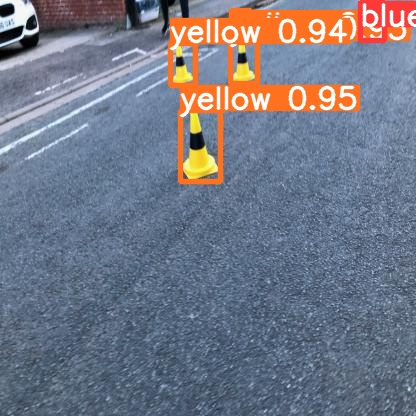

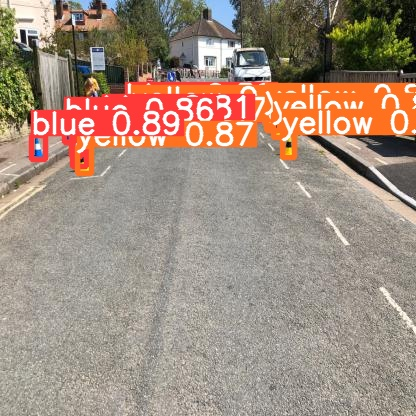

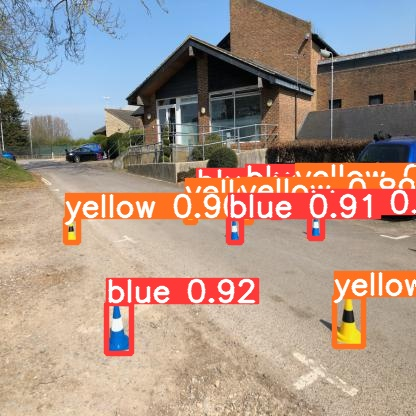

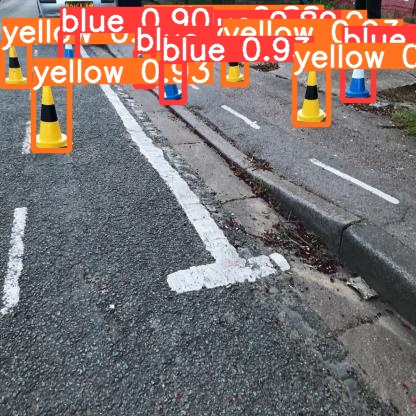

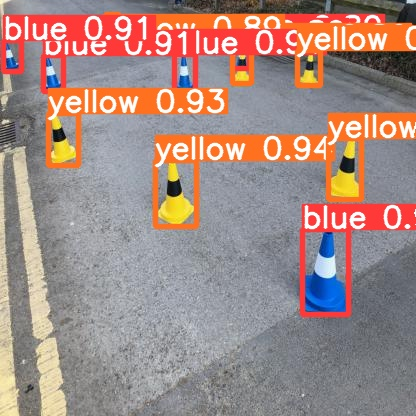

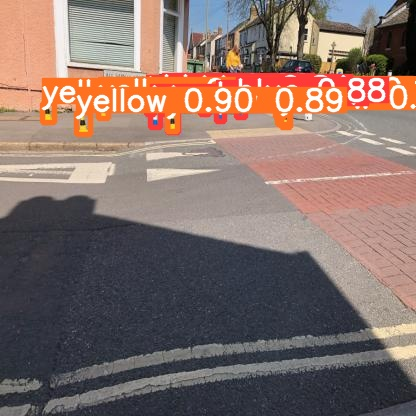

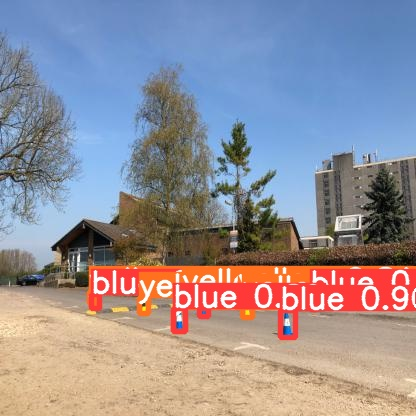

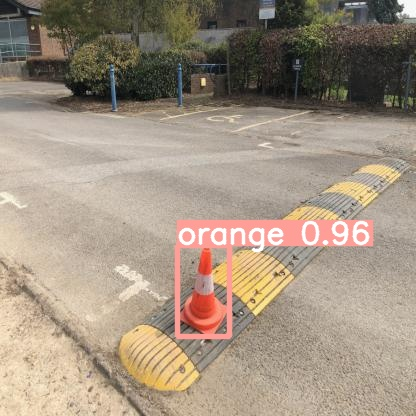

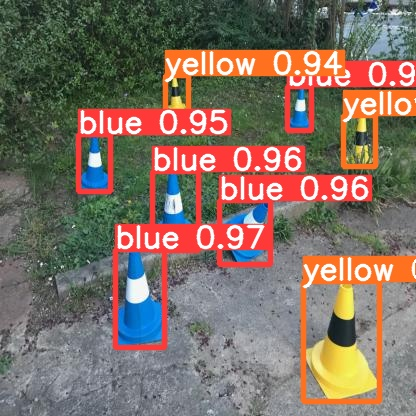

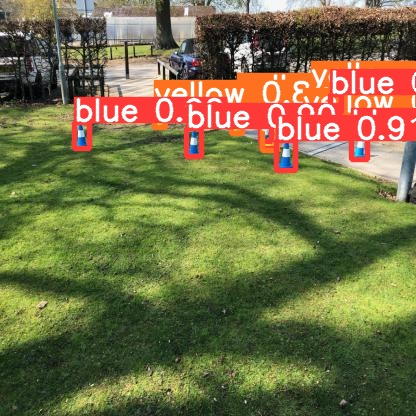

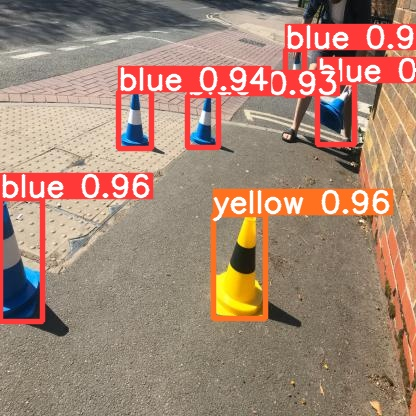

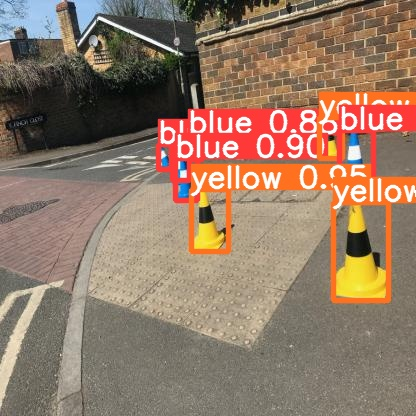

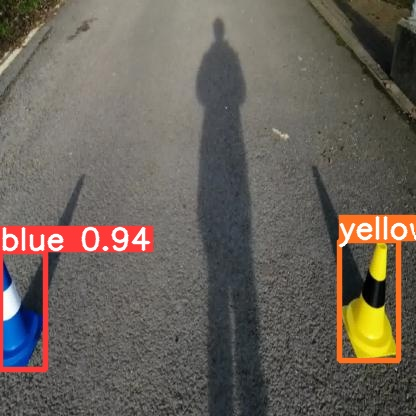

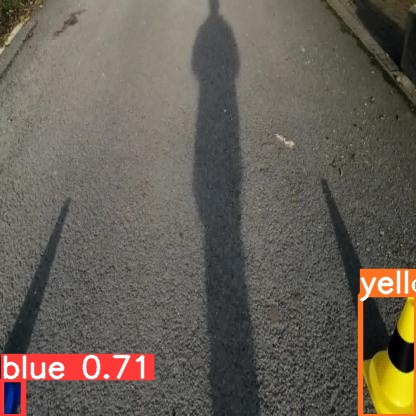

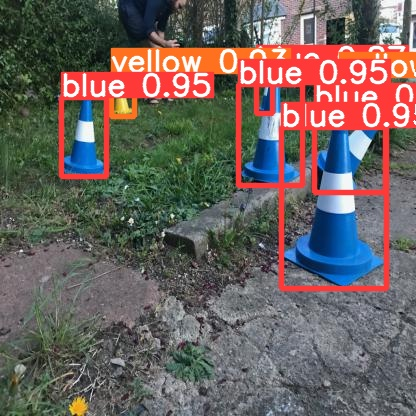

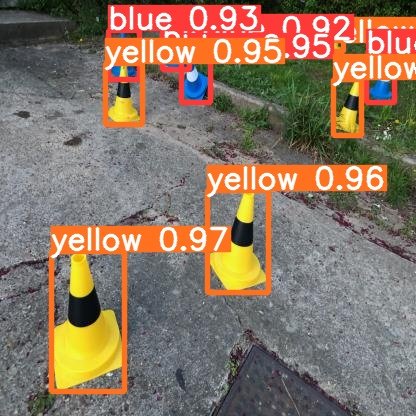

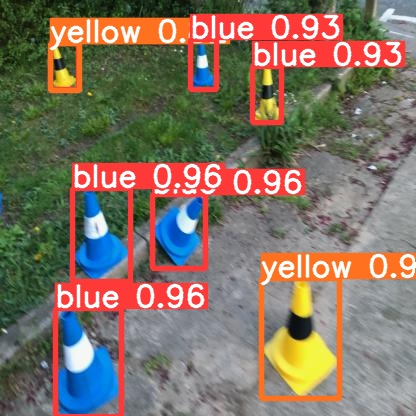

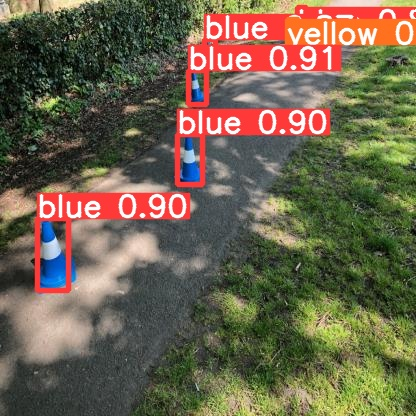

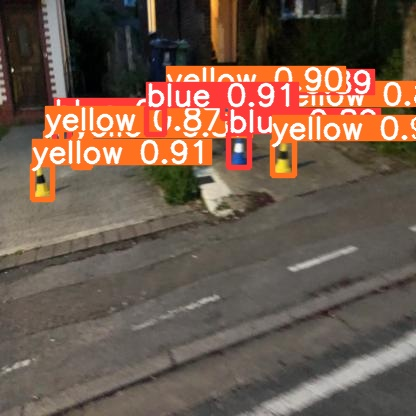

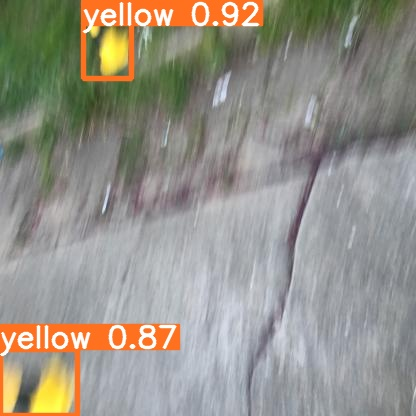

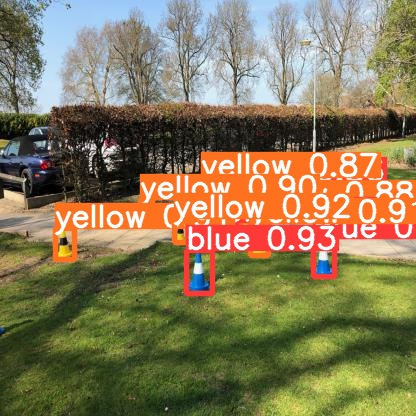

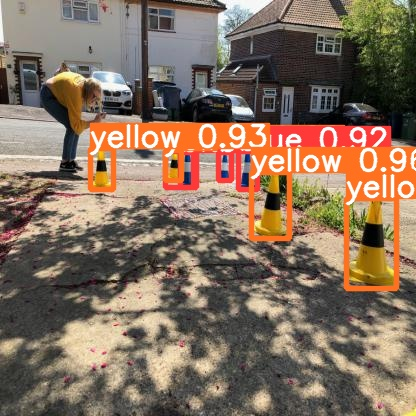

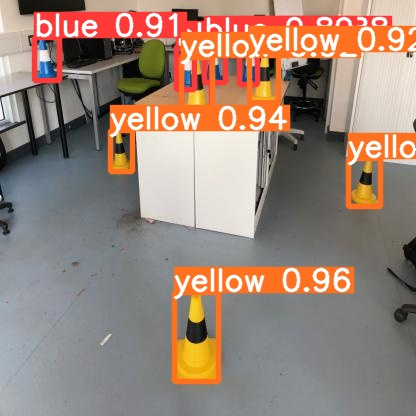

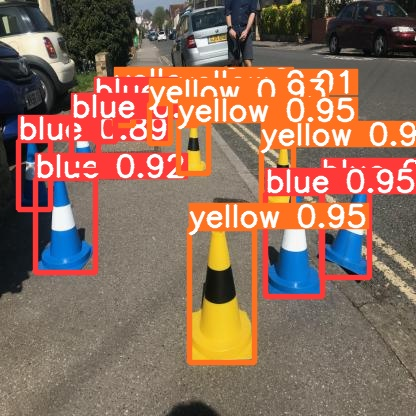

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
import cv2
import torch
from PIL import Image
import os

model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/Data.v1i.yolov5pytorch/best.pt') 

import glob
from IPython.display import Image, display
num = []
for imageName in glob.glob('/content/drive/MyDrive/Data.v1i.yolov5pytorch/test/images/*.jpg'): #assuming JPG

    #display(Image(filename=imageName))
    num.append(str(imageName))
    #print(imageName)
    #print("\n")


# Inference
results = model(num)

# Results
results.print()  
results.save()  # or .show()
results.show()
# Data
print(results.xyxy[0])  # print img1 predictions (pixels)

results.pandas().xyxy[8] 


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-5-11 torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model summary: 224 layers, 7062001 parameters, 0 gradients
Adding AutoShape... 


image 1/52: 416x416 1 blue, 1 yellow
image 2/52: 416x416 5 blues, 1 yellow
image 3/52: 416x416 4 yellows
image 4/52: 416x416 5 blues, 3 yellows
image 5/52: 416x416 5 blues, 3 yellows
image 6/52: 416x416 1 yellow
image 7/52: 416x416 1 blue, 1 yellow
image 8/52: 416x416 5 blues, 3 yellows
image 9/52: 416x416 7 blues, 5 yellows
image 10/52: 416x416 1 blue, 1 yellow
image 11/52: 416x416 4 blues, 5 yellows
image 12/52: 416x416 7 blues, 6 yellows
image 13/52: 416x416 5 blues, 5 yellows
image 14/52: 416x416 6 blues, 6 yellows
image 15/52: 416x416 6 blues, 3 yellows
image 16/52: 416x416 3 blues, 4 yellows
image 17/52: 416x416 5 blues, 6 yellows
image 18/52: 416x416 1 blue
image 19/52: 416x416 5 blues, 2 yellows
image 20/52: 416x416 5 blues, 1 yellow
image 21/52: 416x416 6 blues, 6 yellows
image 22/52: 416x416 1 blue
image 23/52: 416x416 6 blues, 4 yellows
image 24/52: 416x416 6 blues, 3 yellows
image 25/52: 416x416 3 blues, 3 yellows
image 26/52: 416x416 2 yellows
image 27/52: 416x416 5 blues,

Saved 52 images to runs/detect/exp13


tensor([[3.39228e+02, 2.39730e+02, 3.99041e+02, 3.58448e+02, 9.53119e-01, 2.00000e+00],
        [2.48972e-02, 2.54101e+02, 4.54559e+01, 3.67667e+02, 9.23367e-01, 0.00000e+00]], device='cuda:0')


xmin        ymin        xmax        ymax  confidence  class    name
0   105.074425  302.535980  131.274277  353.595795    0.929165      0    blue
1   333.404358  294.507660  362.578583  346.924988    0.928020      2  yellow
2   308.897644  214.977478  322.648254  238.618851    0.900524      0    blue
3   228.053665  218.330765  240.844742  242.295227    0.884480      0    blue
4    64.367775  218.467560   78.196312  241.729843    0.884269      2  yellow
5   239.884583  202.391342  251.807831  222.024002    0.882270      2  yellow
6   271.279388  199.418930  281.526978  217.120285    0.881341      0    blue
7   294.719971  187.368179  304.396271  203.729263    0.871841      2  yellow
8   184.405396  201.643250  196.149033  222.190338    0.869444      2  yellow
9   244.339615  188.367386  253.315079  203.123581    0.857213      0    blue
10  195.527130  193.021484  205.437836  208.726379    0.855265      0    blue
11  240.549774  202.256104  252.037170  221.978973    0.402846      0    blue

In [ ]:
num

['/content/drive/MyDrive/Data.v1i.yolov5pytorch/test/images/115_png.rf.a29dd36d7a32aa43542428b6a7128ac0.jpg',
 '/content/drive/MyDrive/Data.v1i.yolov5pytorch/test/images/192_png.rf.a1d9bb128b9ad505789834fc5e8678c1.jpg',
 '/content/drive/MyDrive/Data.v1i.yolov5pytorch/test/images/30_png.rf.0e1409e24f7d1b8afe10d39a9fcf9e95.jpg',
 '/content/drive/MyDrive/Data.v1i.yolov5pytorch/test/images/389_png.rf.840f5f21263fc6bbe92b9d4d18738c85.jpg',
 '/content/drive/MyDrive/Data.v1i.yolov5pytorch/test/images/473_png.rf.a31aea4e9bb5a5da4d4630f0592fb249.jpg',
 '/content/drive/MyDrive/Data.v1i.yolov5pytorch/test/images/461_png.rf.fe5afd88c67225d46ebc026991575caf.jpg',
 '/content/drive/MyDrive/Data.v1i.yolov5pytorch/test/images/274_png.rf.c911cdcb3942da272c77d6a7920cf9a5.jpg',
 '/content/drive/MyDrive/Data.v1i.yolov5pytorch/test/images/428_png.rf.5b01f7ecd817b9c9219a66351bc856e2.jpg',
 '/content/drive/MyDrive/Data.v1i.yolov5pytorch/test/images/542_png.rf.deb83e0dd106a6c2c8fc907446e4454f.jpg',
 '/content/